In [64]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error as mse
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [66]:
gr1 = pd.read_csv('./drive-download-20190905T143023Z-001/test1.csv')
gr2 = pd.read_csv('./drive-download-20190905T143023Z-001/test2.csv')
t1 = pd.read_csv('./일평균결제량1.2mean_log1.5_0초과유저로학습(12000점)/test1_predict.csv')
t2 = pd.read_csv('./일평균결제량1.2mean_log1.5_0초과유저로학습(12000점)/test2_predict.csv')

In [65]:
t1['g'] = gr1['y_pred']
t2['g'] = gr2['y_pred']

In [30]:
# 1 이상 과금 유저는 1일 이탈 유저일 확률이 높으므로
# 과금 1 이상이고, 이전에 예측한 생존기간이 1이면 1구간 유저로 판단
# 1000점 오름 = 13000
t1['g'] = np.where((t1['amount_spent']>=1) & (t1['survival_time']==1),1,t1['g'])
t2['g'] = np.where((t2['amount_spent']>=1) & (t2['survival_time']==1),1,t2['g'])

In [60]:
t1['g'] = np.where((t1['amount_spent']>=5),1,t1['g'])
t2['g'] = np.where((t2['amount_spent']>=5),1,t2['g'])

In [61]:
t1['survival_time'] = np.where(t1['g']==1,1,np.where(t1['g']==2, 20, np.where(t1['g']==3, 40, 64)))
t2['survival_time'] = np.where(t2['g']==1,1,np.where(t2['g']==2, 20, np.where(t2['g']==3, 50, 64)))

In [62]:
test1_predict= t1.drop('g',axis=1)
test2_predict= t2.drop('g',axis=1)

In [63]:
test1_predict.to_csv('./drive-download-20190905T143023Z-001/test1_predict.csv', index=False)
test2_predict.to_csv('./drive-download-20190905T143023Z-001/test2_predict.csv', index=False)

In [17]:
test1_predict

,acc_id,survival_time,amount_spent
0,7,1,0.000000
1,15,1,0.043754
2,16,20,8.756132
3,18,64,0.122310
4,19,64,0.090335
5,22,64,0.095681
6,24,1,4.119257
7,28,64,1.369273
8,39,64,0.193041
9,51,20,0.000000


In [14]:
test1_predict

NameError: name 'test1_predict' is not defined

In [27]:
t1

,acc_id,survival_time,amount_spent,g
0,7,64,0.000000,1
1,15,64,0.043754,1
2,16,1,8.756132,2
3,18,64,0.122310,4
4,19,64,0.090335,4
5,22,64,0.095681,4
6,24,1,4.119257,1
7,28,64,1.369273,4
8,39,64,0.193041,4
9,51,64,0.000000,2


In [58]:
t1[(t1['amount_spent']>=5)].count()

acc_id           860
survival_time    860
amount_spent     860
g                860
dtype: int64

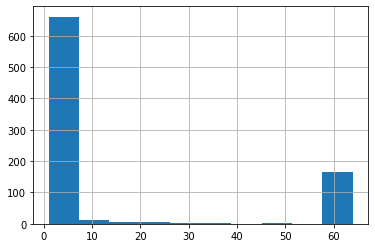

In [59]:
t1[(t1['amount_spent']>=5)]['survival_time'].hist()

In [28]:
t1[(t1['amount_spent']>=1) & (t1['g']!=1)]

,acc_id,survival_time,amount_spent,g
2,16,1,8.756132,2
7,28,64,1.369273,4
33,153,64,2.748325,3
98,662,64,1.732149,3
111,773,64,3.979122,3
130,891,10,2.962459,3
169,1128,64,3.603237,2
219,1366,64,1.311493,4
400,2444,64,2.304874,3
417,2588,64,6.563921,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018C0E952F28>,
      dtype=object)

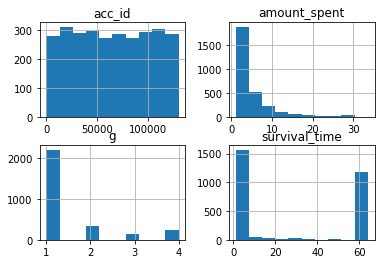

In [29]:
t1[(t1['amount_spent']>=1)].hist()

기간분류까지 끝낸 모델

In [ ]:
surv1 = pd.read_csv('./태정이형기간분류와요일분류/.csv') 
surv2 = pd.read_csv('./태정이형기간분류와요일분류/.csv') 

In [67]:
t1 = pd.read_csv('./태정이형기간분류와요일분류/test2_predict_생존회귀그대로적용13816점.csv')
t2 = pd.read_csv('./태정이형기간분류와요일분류/test2_predict_생존회귀그대로적용13816점.csv')



In [68]:
t1 = t1.rename(columns={'survival_time':'survival_pre'})
t2 = t2.rename(columns={'survival_time':'survival_pre'})

In [69]:
# 분류모델 생존기간 넣기
t1['survival_time'] = surv1
t2['survival_time'] = surv2

,acc_id,survival_pre,amount_spent
0,1,53.0,0.070648
1,3,1.0,1.263888
2,9,1.0,5.000011
3,14,15.0,0.759212
4,26,64.0,0.009048
5,27,53.0,0.016134
6,32,22.0,0.112927
7,44,28.0,1.634373
8,45,46.0,0.027202
9,49,64.0,0.007040


In [ ]:
plt.hist(t1['survival_time'])

In [ ]:
# 결제량
t1['survival_time'] = np.where(t1['amount_spent']>=1,1,t1['survival_time'])

In [ ]:
del t1['survival_pre']
del t2['survival_pre']

In [ ]:
t1.to_csv('./태정이형기간분류와요일분류/test1_predict.csv', index=False)
t2.to_csv('./태정이형기간분류와요일분류/test2_predict.csv', index=False)